In [5]:
from pathlib import Path
import numpy as np
from scipy.spatial.distance import cdist
from resemblyzer import VoiceEncoder, preprocess_wav
import torch

# ---------------------------------------------------------------------
# 1)  Initialise encoder once (weights are auto-downloaded on first run)
# ---------------------------------------------------------------------
device = torch.device('mps')
encoder = VoiceEncoder(device=device)


Loaded the voice encoder model on mps in 0.07 seconds.


In [6]:
from modelloAudio import load as load_modello_audio, compute_emb

In [ ]:
import pandas as pd
df = pd.read_csv('other.tsv', sep='\t')
client_audio_dict = {}

for index, row in df.iterrows():
    client_id = row['client_id']
    audio_path = f"/Users/paolocursi/Desktop/multimodal/AUDIO_DS/{row['path']}"
    
    if client_id not in client_audio_dict:
        client_audio_dict[client_id] = []
    
    client_audio_dict[client_id].append(audio_path)

# Display summary
print(f"Number of unique clients: {len(client_audio_dict)}")
print(f"Example client with their audio files:")
for client_id, audio_files in list(client_audio_dict.items())[:3]:
    print(f"Client {client_id}: {len(audio_files)} audio files")
    for audio_file in audio_files[:2]:  # Show first 2 files
        print(f"  - {audio_file}")

Number of unique clients: 1038
Example client with their audio files:
Client c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c61e2cbd8bb1691eaf37e548a9bbf4d7cb8271ce66632c5fb546ddac7349de685bce92950d9268308f38: 5 audio files
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910499.mp3
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910500.mp3
Client ad4539e869b68c16c7c5084fc8aa451376aaa1cc209f4b909e384fad959c6f905cee2d3dd9537619d988107b383b033a461809f0ca955e38c17faec728bda8a1: 5 audio files
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910504.mp3
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910505.mp3
Client 79d543138d8b1a49e9c2e74ff9a129bd3f34bd597cff59f8485b011eac15cb6113062d17df49c5b649e4c4793ebce6bb76488cc81bf22a7de0f1a37eaeff9b18: 110 audio files
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910643.mp3
  - /Users/paolocursi/Desktop/multimodal/AUDIO_DS/common_voice_en_41910644.mp3


In [21]:
# Create a mapping from client_id to integer
client_id_mapping = {i: client_id for i, client_id in enumerate(client_audio_dict.keys())}

# Create new dictionary with integer keys
client_audio_dict_int = {}
for i, (client_id, audio_files) in enumerate(client_audio_dict.items()):
    client_audio_dict_int[i] = audio_files

print(f"Original keys (first 5): {list(client_audio_dict.keys())[:5]}")
print(f"New integer keys (first 5): {list(client_audio_dict_int.keys())[:5]}")
print(f"Number of clients: {len(client_audio_dict_int)}")

Original keys (first 5): ['c0eba1c07e2a8ab6860c8845e735a9e22348fc951e43c61e2cbd8bb1691eaf37e548a9bbf4d7cb8271ce66632c5fb546ddac7349de685bce92950d9268308f38', 'ad4539e869b68c16c7c5084fc8aa451376aaa1cc209f4b909e384fad959c6f905cee2d3dd9537619d988107b383b033a461809f0ca955e38c17faec728bda8a1', '79d543138d8b1a49e9c2e74ff9a129bd3f34bd597cff59f8485b011eac15cb6113062d17df49c5b649e4c4793ebce6bb76488cc81bf22a7de0f1a37eaeff9b18', '82133730d76cf8ed4b6458ca206e3a9e505d8e8c15a3b0b56ad05c01541d254e5ded8ecce4380a981bc73eb48013b2849e36bd666ebc1530e6c7b3c85846e2b6', '4337d1a431d438a0ed9b4c06db9fcc6bf8eba5cca54a450ba1e8d72a5b7d657f4a417e3bdc607ede20f3c701bb77743d83327eb2ee915e603fc797ac4534af67']
New integer keys (first 5): [0, 1, 2, 3, 4]
Number of clients: 1038


In [23]:
# Filter out clients with less than 5 audio files and limit to exactly 5 files per client
client_audio_dict_int_filtered = {}

for client_int_id, audio_files in client_audio_dict_int.items():
    if len(audio_files) >= 5:
        # Take only the first 5 audio files
        client_audio_dict_int_filtered[client_int_id] = audio_files[:5]

print(f"Original number of clients: {len(client_audio_dict_int)}")
print(f"Filtered number of clients (>=5 files): {len(client_audio_dict_int_filtered)}")
print(f"All clients now have exactly 5 audio files each")

# Verify the filtering
for client_id, audio_files in list(client_audio_dict_int_filtered.items())[:3]:
    print(f"Client {client_id}: {len(audio_files)} audio files")

Original number of clients: 1038
Filtered number of clients (>=5 files): 877
All clients now have exactly 5 audio files each
Client 0: 5 audio files
Client 1: 5 audio files
Client 2: 5 audio files


In [25]:
for i in client_audio_dict_int_filtered:
    print(len(client_audio_dict_int_filtered[i]))

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [29]:
# Compute embeddings for each client using the first 2 audio files
client_embeddings = {}

for client_int_id, audio_files in client_audio_dict_int_filtered.items():
    # Take only the first 2 audio files
    first_two_files = audio_files[:2]
    
    embeddings = []
    for audio_file in first_two_files:
        try:
            embedding = compute_emb(model,audio_file)
            embeddings.append(embedding)
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")
    
    # Store as tuple if we have 2 embeddings
    if len(embeddings) == 2:
        client_embeddings[client_int_id] = tuple(embeddings)
    
    print(f"Processed client {client_int_id}: {len(embeddings)} embeddings")

print(f"\nTotal clients with embeddings: {len(client_embeddings)}")

Processed client 0: 2 embeddings
Processed client 1: 2 embeddings
Processed client 2: 2 embeddings
Processed client 3: 2 embeddings
Processed client 4: 2 embeddings
Processed client 5: 2 embeddings
Processed client 6: 2 embeddings
Processed client 7: 2 embeddings
Processed client 8: 2 embeddings
Processed client 9: 2 embeddings
Processed client 10: 2 embeddings
Processed client 11: 2 embeddings
Processed client 12: 2 embeddings
Processed client 13: 2 embeddings
Processed client 15: 2 embeddings
Processed client 16: 2 embeddings
Processed client 17: 2 embeddings
Processed client 18: 2 embeddings
Processed client 19: 2 embeddings
Processed client 20: 2 embeddings
Processed client 21: 2 embeddings
Processed client 23: 2 embeddings
Processed client 25: 2 embeddings
Processed client 26: 2 embeddings
Processed client 27: 2 embeddings
Processed client 28: 2 embeddings
Processed client 30: 2 embeddings
Processed client 31: 2 embeddings
Processed client 32: 2 embeddings
Processed client 33: 2 e

In [31]:
import numpy as np
from scipy.spatial.distance import cosine

# Compute cosine similarities for client embeddings
client_similarities = {}

# Get all client IDs
client_ids = list(client_embeddings.keys())

for client_id in client_ids:
    client_similarities[client_id] = {}
    
    # Get embeddings for current client
    client_emb1, client_emb2 = client_embeddings[client_id]
    
    for other_client_id in client_ids:
        if client_id == other_client_id:
            # Same client: compare first and second embeddings
            cos_sim = np.dot(client_emb1, client_emb2) / (np.linalg.norm(client_emb1) * np.linalg.norm(client_emb2))
            client_similarities[client_id][other_client_id] = cos_sim
        else:
            # Different clients: compare first embeddings
            other_emb1, _ = client_embeddings[other_client_id]
            cos_sim = np.dot(client_emb1, other_emb1) / (np.linalg.norm(client_emb1) * np.linalg.norm(other_emb1))
            client_similarities[client_id][other_client_id] = cos_sim

print(f"Computed similarities for {len(client_similarities)} clients")

Computed similarities for 877 clients


In [33]:
# Calculate accuracy for the client similarity matrix
correct_predictions = 0
total_predictions = len(client_similarities)

for client_id in client_similarities.keys():
    # Get similarities for this client
    similarities_row = client_similarities[client_id]
    
    # Find the client with maximum similarity
    max_similarity_client = max(similarities_row.keys(), key=lambda k: similarities_row[k])
    
    # Check if the maximum similarity is with itself (correct prediction)
    if max_similarity_client == client_id:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Client Similarity Accuracy: {accuracy:.4f}")
print(f"Correct predictions: {correct_predictions}/{total_predictions}")

Client Similarity Accuracy: 0.7742
Correct predictions: 679/877


In [51]:
gallery = {i:client_embeddings[i][0] for i in list(client_embeddings.keys())[:350]}  # Use first 10 clients for gallery
legit = {i:client_embeddings[i][1] for i in list(client_embeddings.keys())[:350]}  # Use first 10 clients for gallery
impostors = {i:client_embeddings[i][1] for i in list(client_embeddings.keys())[350:700]}  # Use first 10 clients for gallery

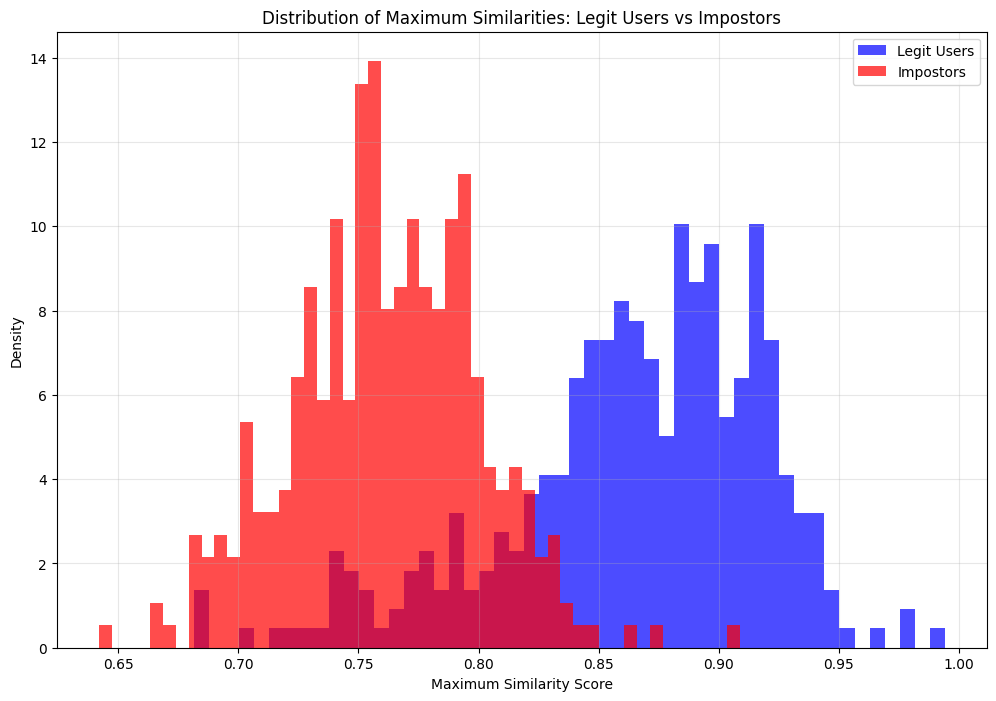

Legit users - Mean max similarity: 0.8649
Legit users - Std max similarity: 0.0546
Impostors - Mean max similarity: 0.7616
Impostors - Std max similarity: 0.0385


In [52]:
import numpy as np

import matplotlib.pyplot as plt

# Compute similarities for legit users vs gallery
legit_vs_gallery_similarities = []
for legit_id, legit_emb in legit.items():
    similarities = []
    for gallery_id, gallery_emb in gallery.items():
        # Compute cosine similarity
        cos_sim = np.dot(legit_emb, gallery_emb) / (np.linalg.norm(legit_emb) * np.linalg.norm(gallery_emb))
        similarities.append(cos_sim)
    # Get maximum similarity for this legit user
    max_sim = max(similarities)
    legit_vs_gallery_similarities.append(max_sim)

# Compute similarities for impostor users vs gallery
impostor_vs_gallery_similarities = []
for impostor_id, impostor_emb in impostors.items():
    similarities = []
    for gallery_id, gallery_emb in gallery.items():
        # Compute cosine similarity
        cos_sim = np.dot(impostor_emb, gallery_emb) / (np.linalg.norm(impostor_emb) * np.linalg.norm(gallery_emb))
        similarities.append(cos_sim)
    # Get maximum similarity for this impostor user
    max_sim = max(similarities)
    impostor_vs_gallery_similarities.append(max_sim)

# Plot the distributions
plt.figure(figsize=(12, 8))
plt.hist(legit_vs_gallery_similarities, bins=50, alpha=0.7, color='blue', label='Legit Users', density=True)
plt.hist(impostor_vs_gallery_similarities, bins=50, alpha=0.7, color='red', label='Impostors', density=True)
plt.xlabel('Maximum Similarity Score')
plt.ylabel('Density')
plt.title('Distribution of Maximum Similarities: Legit Users vs Impostors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Legit users - Mean max similarity: {np.mean(legit_vs_gallery_similarities):.4f}")
print(f"Legit users - Std max similarity: {np.std(legit_vs_gallery_similarities):.4f}")
print(f"Impostors - Mean max similarity: {np.mean(impostor_vs_gallery_similarities):.4f}")
print(f"Impostors - Std max similarity: {np.std(impostor_vs_gallery_similarities):.4f}")

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

# Combine all similarities into labels and scores arrays
y_true = []
y_scores = []

# Add legit similarities (label = 1)
for legit_sim in legit_vs_gallery_similarities:
    y_true.append(1)
    y_scores.append(legit_sim)

# Add impostor similarities (label = 0) 
for impostor_sim in impostor_vs_gallery_similarities:
    y_true.append(0)
    y_scores.append(impostor_sim)

y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate EER (Equal Error Rate)
# EER occurs where FPR = 1 - TPR (or FPR = FNR)
fnr = 1 - tpr
eer_index = np.argmin(np.abs(fpr - fnr))
eer = fpr[eer_index] 
eer_threshold = thresholds[eer_index]

print(f"Equal Error Rate (EER): {eer:.4f}")
print(f"EER Threshold: {eer_threshold:.4f}")
print(f"FPR at EER: {fpr[eer_index]:.4f}")
print(f"TPR at EER: {tpr[eer_index]:.4f}")
print(f"FNR at EER: {fnr[eer_index]:.4f}")

Equal Error Rate (EER): 0.1286
EER Threshold: 0.8030
FPR at EER: 0.1286
TPR at EER: 0.8686
FNR at EER: 0.1314


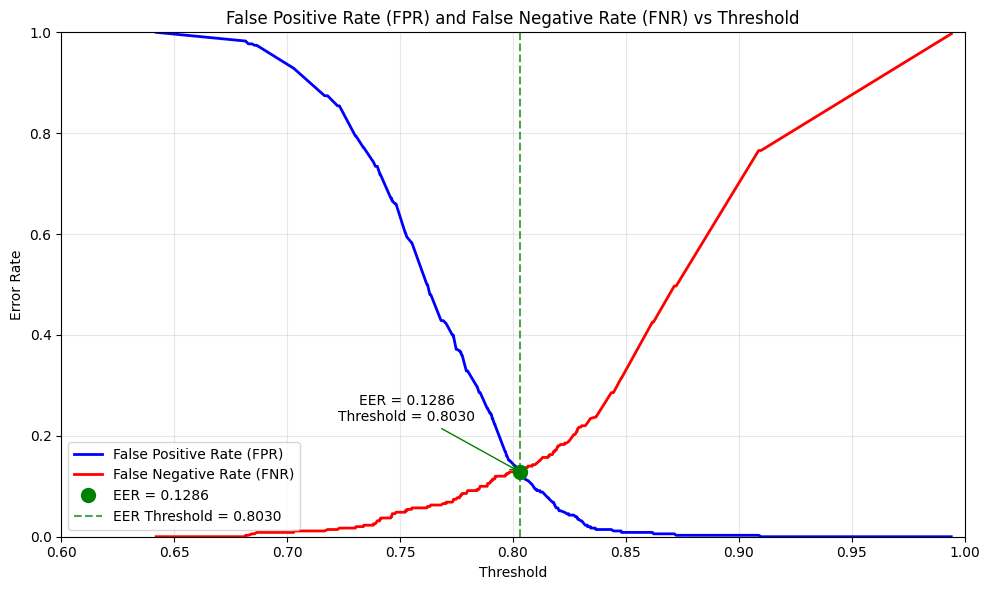

Equal Error Rate (EER): 0.1286
Optimal Threshold: 0.8030


In [56]:
# Plot FPR, FNR, and EER
plt.figure(figsize=(10, 6))

# Plot FPR and FNR curves
plt.plot(thresholds[1:], fpr[1:], 'b-', label='False Positive Rate (FPR)', linewidth=2)
plt.plot(thresholds[1:], fnr[1:], 'r-', label='False Negative Rate (FNR)', linewidth=2)

# Mark the EER point
plt.plot(eer_threshold, eer, 'go', markersize=10, label=f'EER = {eer:.4f}')

# Add vertical line at EER threshold
plt.axvline(x=eer_threshold, color='green', linestyle='--', alpha=0.7, label=f'EER Threshold = {eer_threshold:.4f}')

plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('False Positive Rate (FPR) and False Negative Rate (FNR) vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0.6, 1.0])
plt.ylim([0, 1])

# Add text annotation for EER
plt.annotate(f'EER = {eer:.4f}\nThreshold = {eer_threshold:.4f}', 
             xy=(eer_threshold, eer), xytext=(eer_threshold-0.05, eer+0.1),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print(f"Equal Error Rate (EER): {eer:.4f}")
print(f"Optimal Threshold: {eer_threshold:.4f}")

In [8]:
import pandas as pd

# Read the TSV file
df = pd.read_csv('other.tsv', sep='\t')

# Display the length of entries
print(f"Number of entries in other.tsv: {len(df)}")

Number of entries in other.tsv: 21499


In [6]:
audio = '/Users/paolocursi/Desktop/multimodal/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac'

# Preprocess the audio file and generate embedding
wav = preprocess_wav(audio)
embedding = encoder.embed_utterance(wav)
print(f"Embedding shape: {embedding.shape}")


Embedding shape: (256,)


In [ ]:
# Create a dictionary to store embeddings for each identity
base_path = Path('/Users/paolocursi/Desktop/multimodal/LibriSpeech/dev-clean')
identity_embeddings_split = {}

for identity_folder in base_path.iterdir():
    if identity_folder.is_dir():
        identity_id = identity_folder.name
        embeddings_list = []
        
        # Get all audio files from all subfolders of this identity
        for subfolder in identity_folder.iterdir():
            if subfolder.is_dir():
                for audio_file in subfolder.glob('*.flac'):
                    try:
                        wav_data = preprocess_wav(str(audio_file))
                        embedding = encoder.embed_utterance(wav_data)
                        embeddings_list.append(embedding)
                    except Exception as e:
                        print(f"Error processing {audio_file}: {e}")
        
        # If we have embeddings, calculate averagesa
        if embeddings_list:
            # Get first 10 and second 10 embeddings
            first_10 = embeddings_list[:1]
            second_10 = embeddings_list[1:2] if len(embeddings_list) > 10 else []
            
            # Calculate averages
            avg_first_10 = np.mean(first_10, axis=0) if first_10 else None
            avg_second_10 = np.mean(second_10, axis=0) if second_10 else None
            
            identity_embeddings_split[identity_id] = (avg_first_10, avg_second_10)
        
        print(f"Processed identity {identity_id}: {len(embeddings_list)} embeddings")

print(f"\nTotal identities processed: {len(identity_embeddings_split)}")

Processed identity 2412: 58 embeddings
Processed identity 2078: 52 embeddings
Processed identity 3752: 101 embeddings
Processed identity 1988: 75 embeddings
Processed identity 1919: 64 embeddings
Processed identity 422: 36 embeddings
Processed identity 3000: 47 embeddings
Processed identity 1993: 58 embeddings
Processed identity 6313: 96 embeddings
Processed identity 251: 75 embeddings
Processed identity 8842: 55 embeddings
Processed identity 5536: 59 embeddings
Processed identity 7850: 72 embeddings
Processed identity 174: 59 embeddings
Processed identity 6295: 74 embeddings
Processed identity 7976: 78 embeddings
Processed identity 2803: 57 embeddings
Processed identity 777: 82 embeddings
Processed identity 5694: 83 embeddings
Processed identity 1462: 94 embeddings
Processed identity 5895: 80 embeddings
Processed identity 2086: 55 embeddings
Processed identity 6241: 78 embeddings
Processed identity 2277: 95 embeddings
Processed identity 2428: 87 embeddings
Processed identity 3536: 64 

In [18]:
# Calculate cosine similarities using first embeddings for between-identity comparisons
# and first vs second embedding for within-identity comparisons
similarities = {}

identity_ids = list(identity_embeddings_split.keys())

for i, id1 in enumerate(identity_ids):
    similarities[id1] = {}
    
    for j, id2 in enumerate(identity_ids):
        if i == j:  # Same identity - compare first and second embeddings
            first_emb = identity_embeddings_split[id1][0]
            second_emb = identity_embeddings_split[id1][1]
            
            if first_emb is not None and second_emb is not None:
                # Reshape for cosine distance calculation
                first_emb = first_emb.reshape(1, -1)
                second_emb = second_emb.reshape(1, -1)
                
                # Calculate cosine similarity (1 - cosine distance)
                cosine_dist = cdist(first_emb, second_emb, metric='cosine')[0, 0]
                cosine_sim = 1 - cosine_dist
                similarities[id1][id2] = cosine_sim
            else:
                similarities[id1][id2] = None
        else:  # Different identities - use first embeddings of both
            first_emb1 = identity_embeddings_split[id1][0]
            first_emb2 = identity_embeddings_split[id2][0]
            
            if first_emb1 is not None and first_emb2 is not None:
                # Reshape for cosine distance calculation
                first_emb1 = first_emb1.reshape(1, -1)
                first_emb2 = first_emb2.reshape(1, -1)
                
                # Calculate cosine similarity (1 - cosine distance)
                cosine_dist = cdist(first_emb1, first_emb2, metric='cosine')[0, 0]
                cosine_sim = 1 - cosine_dist
                similarities[id1][id2] = cosine_sim
            else:
                similarities[id1][id2] = None

print(f"Computed similarities for {len(similarities)} identities")

Computed similarities for 40 identities


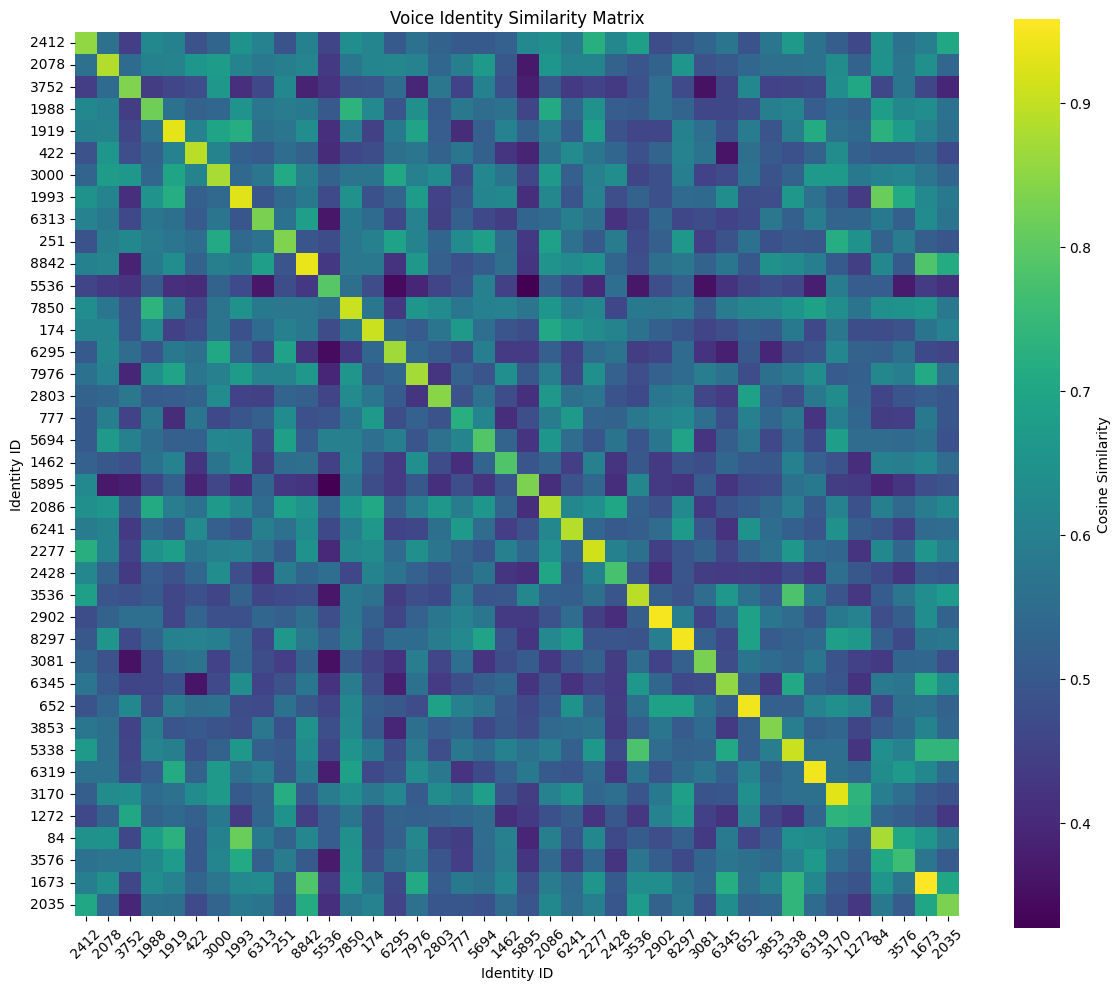

In [19]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Convert similarities dictionary to a DataFrame for easier plotting
similarity_df = pd.DataFrame(similarities)

# Create a heatmap of the similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=False, cmap='viridis', square=True, 
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Voice Identity Similarity Matrix')
plt.xlabel('Identity ID')
plt.ylabel('Identity ID')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
# Calculate accuracy for the similarity matrix
correct_predictions = 0
total_predictions = len(similarity_df)

for identity in similarity_df.index:
    # Get the row for this identity
    similarities_row = similarity_df.loc[identity]
    
    # Find the identity with maximum similarity
    max_similarity_identity = similarities_row.idxmax()
    
    # Check if the maximum similarity is with itself (diagonal element)
    if max_similarity_identity == identity:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Similarity Matrix Accuracy: {accuracy:.4f}")
print(f"Correct predictions: {correct_predictions}/{total_predictions}")

Similarity Matrix Accuracy: 0.9750
Correct predictions: 39/40
